# Reproducing Feldmann-Wustefel CDA Study (2018) Exp1

## Notes

In [1]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_brainvision

import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Feldmann-Wustefeld-2018/')
from events import get_specific_events
 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load, Prep & CDA

Processing: Hudson_0017.vhdr...
Extracting parameters from /Users/nick/Documents/PhD/CDA Datasets/Feldmann-Westefel 2018/AnalysisPipeline/Experiment1/rawEEG/Hudson_0017.vhdr...
Setting channel info structure...
Reading 0 ... 4845419  =      0.000 ...  4845.419 secs...


/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 26 epochs: 30, 31, 37, 72, 120, 153, 250, 257, 260, 320, 340, 348, 349, 416, 432, 491, 514, 593, 622, 653, 742, 743, 786, 818, 872, 908


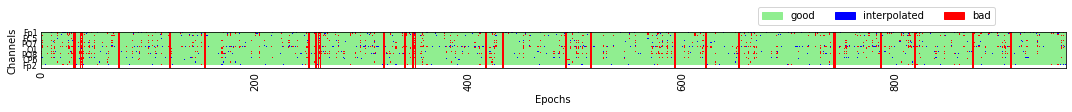

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 17 epochs: 77, 87, 216, 219, 230, 287, 333, 548, 626, 686, 713, 718, 735, 753, 766, 829, 845


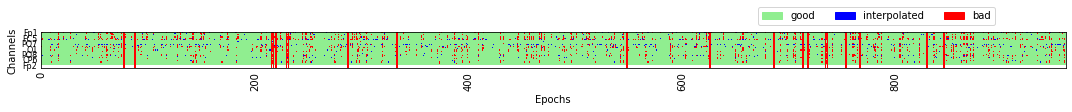

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=4


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 48 epochs: 21, 62, 78, 86, 164, 182, 200, 217, 220, 254, 255, 268, 320, 348, 389, 460, 461, 464, 465, 471, 489, 497, 510, 538, 560, 565, 566, 581, 604, 644, 649, 654, 668, 703, 712, 723, 731, 801, 806, 815, 856, 862, 878, 895, 897, 931, 941, 942


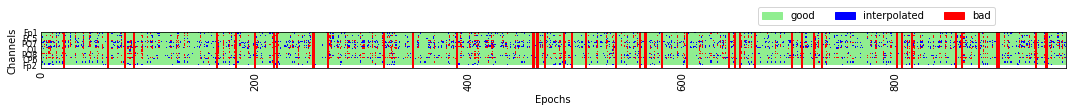

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 97 epochs: 6, 26, 38, 45, 48, 95, 102, 112, 115, 122, 123, 128, 129, 132, 148, 156, 171, 179, 201, 202, 204, 208, 209, 226, 227, 235, 245, 249, 262, 270, 276, 314, 315, 341, 352, 368, 369, 380, 386, 389, 391, 396, 443, 452, 453, 469, 477, 478, 496, 497, 513, 514, 518, 520, 523, 524, 529, 530, 551, 556, 568, 601, 603, 618, 619, 631, 634, 636, 658, 659, 666, 671, 680, 685, 691, 709, 733, 734, 736, 745, 766, 774, 788, 792, 794, 800, 804, 820, 831, 835, 845, 851, 865, 915, 921, 937, 940


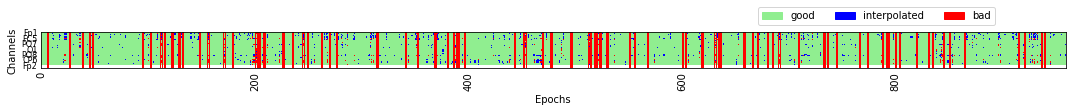

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 24 epochs: 44, 74, 92, 175, 177, 336, 337, 349, 355, 420, 421, 460, 519, 558, 682, 689, 691, 709, 713, 798, 820, 881, 896, 897


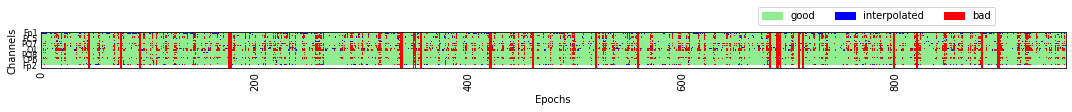

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 151 epochs: 5, 9, 21, 22, 23, 27, 39, 43, 49, 56, 61, 70, 72, 77, 94, 100, 110, 113, 114, 115, 121, 122, 126, 138, 140, 141, 146, 150, 151, 163, 167, 168, 179, 184, 185, 186, 197, 201, 205, 219, 233, 234, 235, 252, 277, 303, 309, 311, 312, 319, 330, 339, 346, 347, 366, 374, 381, 389, 393, 396, 409, 425, 434, 435, 437, 445, 455, 462, 464, 465, 474, 477, 479, 485, 493, 502, 503, 506, 507, 520, 521, 523, 526, 527, 528, 537, 544, 545, 549, 565, 571, 589, 591, 593, 612, 621, 623, 629, 630, 631, 634, 647, 649, 651, 659, 662, 664, 666, 668, 671, 680, 681, 689, 696, 702, 707, 709, 712, 721, 739, 740, 744, 745, 782, 783, 785, 788, 789, 790, 796, 805, 815, 821, 824, 836, 854, 867, 877, 878, 885, 887, 893, 899, 903, 906, 921, 922, 923, 945, 948, 950


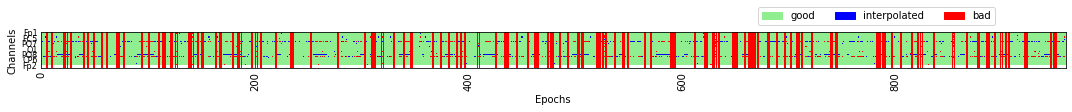

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 480 | Total Added: 480 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 480 events and 1701 original time points ...
0 bad epochs dropped
A total of 480 epoch

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

Dropped 17 epochs: 24, 38, 48, 69, 79, 95, 122, 148, 175, 187, 272, 280, 358, 414, 431, 468, 472


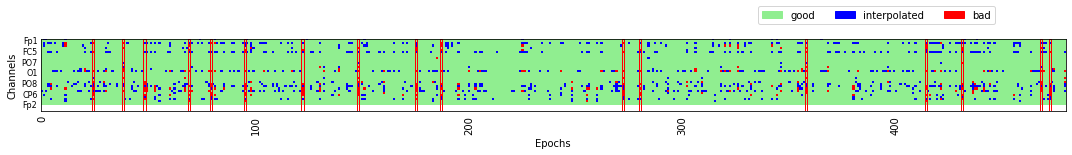

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 30 epochs: 10, 21, 102, 163, 232, 265, 315, 319, 329, 335, 350, 375, 389, 425, 467, 481, 544, 560, 572, 602, 646, 702, 704, 708, 733, 748, 795, 799, 837, 862


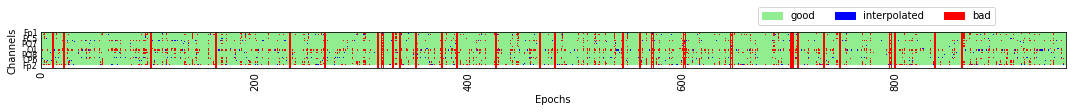

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=4


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 18 epochs: 97, 143, 202, 250, 381, 423, 431, 471, 512, 579, 599, 600, 614, 629, 694, 901, 921, 939


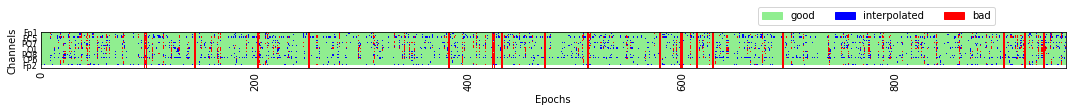

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 14 epochs: 31, 32, 59, 66, 99, 105, 145, 185, 304, 489, 510, 546, 577, 771


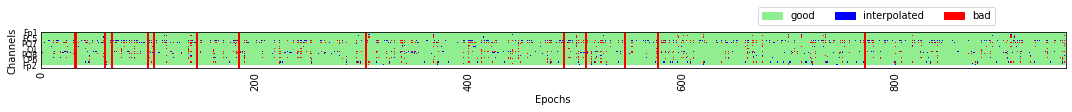

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


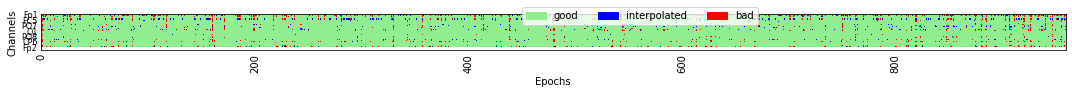

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 12 epochs: 62, 154, 315, 387, 455, 468, 521, 582, 584, 658, 774, 827


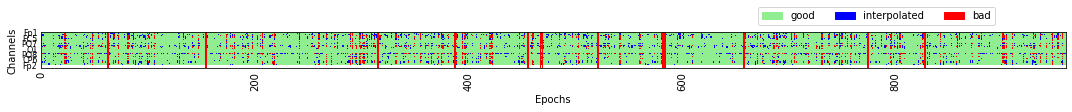

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 18 epochs: 61, 81, 192, 268, 277, 419, 450, 485, 528, 577, 585, 619, 656, 750, 825, 847, 874, 877


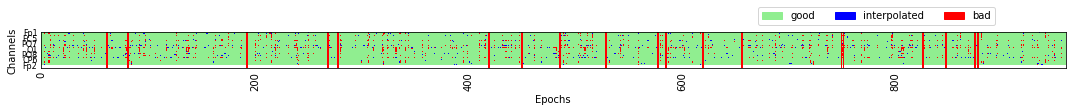

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 64 epochs: 30, 31, 43, 46, 48, 50, 114, 117, 126, 143, 148, 169, 176, 178, 186, 214, 226, 239, 253, 279, 285, 295, 296, 319, 323, 363, 371, 374, 381, 383, 387, 398, 411, 438, 442, 454, 458, 466, 470, 492, 518, 544, 557, 580, 585, 613, 617, 673, 684, 716, 726, 728, 754, 755, 761, 770, 778, 786, 866, 943, 951, 953, 955, 956


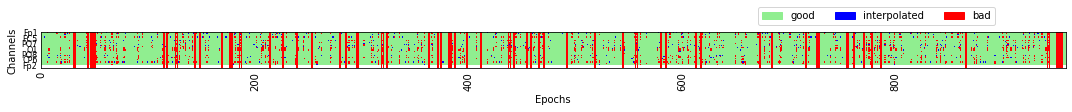

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 142 epochs: 4, 5, 9, 18, 21, 30, 34, 63, 73, 81, 82, 83, 86, 96, 114, 117, 123, 139, 140, 158, 161, 163, 164, 171, 173, 192, 198, 214, 215, 217, 226, 242, 256, 271, 274, 283, 297, 301, 302, 303, 307, 321, 322, 333, 337, 345, 347, 350, 351, 365, 367, 387, 390, 393, 401, 403, 404, 406, 407, 411, 419, 432, 438, 457, 458, 477, 483, 484, 485, 487, 494, 506, 507, 509, 511, 513, 526, 537, 548, 562, 565, 566, 568, 573, 600, 622, 625, 629, 636, 642, 643, 644, 645, 646, 647, 648, 649, 656, 671, 683, 684, 694, 702, 708, 710, 722, 724, 725, 726, 737, 742, 758, 761, 763, 775, 780, 781, 786, 789, 793, 794, 798, 799, 807, 811, 817, 820, 857, 867, 869, 879, 884, 885, 886, 920, 921, 934, 935, 938, 939, 942, 944


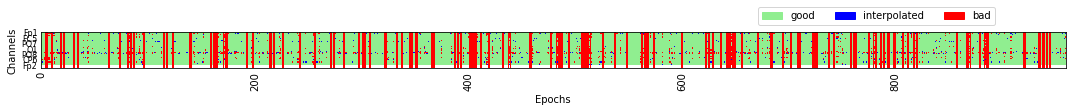

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 155 epochs: 34, 47, 48, 55, 56, 63, 69, 75, 78, 106, 116, 120, 123, 126, 132, 137, 145, 149, 150, 156, 158, 187, 201, 206, 207, 210, 214, 224, 238, 255, 263, 270, 271, 276, 277, 287, 288, 297, 302, 304, 305, 306, 312, 345, 347, 355, 367, 369, 371, 380, 386, 387, 388, 392, 397, 425, 430, 431, 433, 436, 438, 444, 447, 448, 451, 457, 459, 460, 463, 479, 498, 508, 515, 517, 528, 532, 537, 543, 544, 545, 546, 547, 548, 549, 554, 555, 559, 569, 586, 590, 593, 601, 609, 611, 612, 613, 614, 623, 633, 666, 684, 686, 690, 694, 700, 707, 708, 711, 712, 717, 718, 737, 753, 761, 764, 765, 768, 772, 773, 776, 779, 791, 794, 796, 798, 825, 829, 834, 837, 842, 846, 849, 857, 863, 864, 865, 872, 874, 875, 884, 899, 907, 910, 914, 923, 925, 927, 930, 931, 933, 944, 945, 946, 949, 959


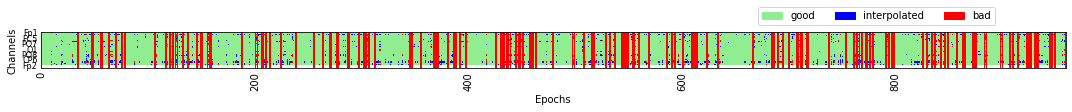

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 114 epochs: 12, 14, 17, 24, 33, 36, 52, 72, 76, 107, 110, 122, 124, 126, 133, 145, 148, 150, 193, 196, 202, 203, 211, 214, 217, 234, 235, 246, 257, 267, 280, 284, 287, 288, 302, 314, 357, 360, 364, 368, 376, 385, 394, 398, 410, 423, 429, 432, 433, 444, 460, 470, 473, 475, 479, 499, 517, 518, 520, 521, 525, 526, 536, 549, 552, 553, 564, 567, 592, 593, 597, 606, 607, 608, 610, 620, 659, 668, 678, 682, 684, 688, 692, 693, 717, 721, 731, 759, 766, 774, 777, 778, 783, 796, 797, 815, 820, 824, 826, 828, 832, 836, 843, 844, 845, 847, 849, 855, 867, 873, 876, 934, 936, 955


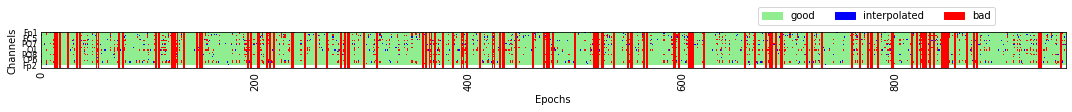

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 484 epochs: 1, 5, 6, 8, 12, 14, 17, 20, 21, 22, 23, 26, 28, 33, 34, 35, 36, 37, 38, 39, 41, 42, 45, 46, 47, 49, 50, 52, 54, 55, 58, 59, 61, 62, 63, 64, 67, 68, 69, 73, 76, 77, 78, 82, 91, 95, 97, 98, 101, 102, 103, 105, 107, 108, 109, 110, 111, 112, 115, 116, 118, 120, 121, 123, 124, 125, 126, 128, 130, 133, 135, 137, 141, 144, 145, 146, 147, 149, 152, 153, 154, 155, 158, 159, 164, 165, 169, 170, 171, 172, 175, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 201, 205, 206, 208, 209, 210, 212, 213, 222, 223, 225, 230, 232, 233, 234, 235, 236, 237, 248, 249, 251, 256, 258, 259, 260, 262, 263, 264, 266, 267, 268, 269, 270, 274, 275, 277, 279, 281, 282, 287, 288, 289, 290, 292, 294, 295, 298, 300, 301, 303, 304, 305, 308, 310, 312, 313, 314, 315, 316, 319, 323, 324, 328, 330, 331, 332, 334, 335, 341, 342, 343, 346, 347, 348, 352, 354, 360, 361, 363, 364, 366, 367, 368, 370, 371, 373, 374, 377, 378, 379, 386, 387, 391, 392, 393, 39

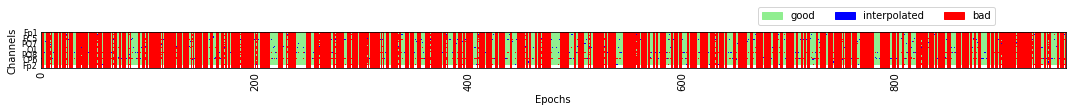

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 146 epochs: 1, 2, 30, 35, 36, 37, 41, 49, 51, 57, 63, 69, 70, 78, 80, 81, 84, 93, 103, 108, 119, 120, 134, 145, 160, 161, 167, 171, 212, 229, 230, 233, 234, 240, 241, 242, 244, 245, 251, 269, 272, 277, 291, 300, 302, 311, 317, 323, 329, 339, 357, 373, 375, 382, 387, 399, 402, 410, 416, 417, 418, 426, 436, 455, 475, 477, 481, 482, 485, 487, 490, 496, 498, 499, 503, 505, 510, 512, 515, 517, 519, 538, 544, 545, 546, 552, 560, 561, 570, 572, 574, 590, 625, 626, 627, 637, 640, 641, 642, 648, 660, 667, 670, 674, 677, 679, 688, 698, 720, 721, 722, 723, 724, 728, 737, 744, 745, 752, 757, 763, 787, 792, 793, 800, 801, 810, 811, 815, 820, 821, 826, 834, 836, 852, 853, 854, 865, 866, 878, 880, 881, 900, 916, 925, 942, 946


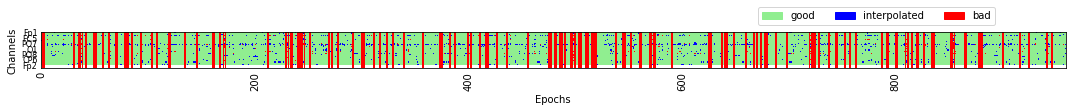

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Overlapping Events with no Cond! Skipping...
Nb Trials: 955 | Total Added: 955 | Total Skipped: 1 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
955 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 955 events and 1701 original time points 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 955 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/955 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/955 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/955 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/955 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/955 [00:00<?,       ?it/s]

Dropped 41 epochs: 37, 39, 47, 49, 126, 129, 131, 134, 176, 181, 197, 211, 251, 313, 374, 387, 392, 409, 448, 472, 518, 566, 583, 608, 611, 628, 670, 678, 682, 686, 711, 712, 733, 776, 804, 814, 829, 916, 922, 933, 952


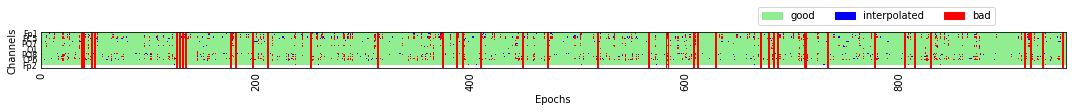

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 306 epochs: 3, 6, 12, 13, 17, 19, 23, 24, 25, 27, 32, 36, 39, 40, 41, 52, 55, 57, 59, 64, 66, 69, 72, 81, 88, 89, 93, 95, 97, 98, 105, 109, 112, 113, 114, 118, 120, 125, 126, 131, 132, 137, 145, 147, 153, 157, 161, 162, 163, 164, 165, 172, 174, 182, 183, 184, 191, 193, 194, 195, 198, 205, 213, 227, 228, 230, 232, 233, 235, 238, 248, 250, 256, 258, 261, 263, 268, 269, 270, 277, 279, 280, 282, 289, 301, 306, 319, 320, 323, 324, 331, 333, 334, 335, 337, 341, 342, 343, 344, 345, 347, 348, 349, 353, 354, 355, 356, 362, 373, 375, 376, 380, 385, 387, 396, 397, 398, 413, 417, 419, 420, 422, 423, 424, 425, 426, 429, 430, 434, 436, 437, 439, 440, 443, 446, 459, 461, 470, 471, 472, 473, 478, 483, 485, 487, 488, 491, 493, 495, 497, 500, 504, 505, 506, 508, 509, 513, 522, 525, 528, 536, 546, 547, 548, 549, 550, 552, 554, 561, 564, 565, 567, 571, 575, 576, 578, 579, 582, 583, 584, 585, 588, 589, 590, 591, 593, 595, 597, 599, 600, 605, 607, 610, 613, 615, 619, 620, 622, 624, 625, 636, 644, 64

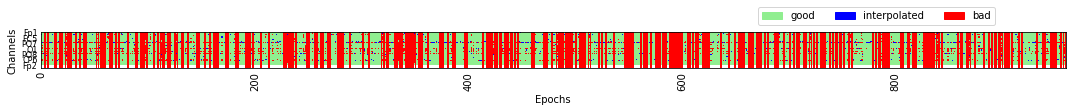

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:1.5, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 960 events and 1701 original time points ...


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 20 epochs: 49, 71, 107, 150, 235, 294, 365, 432, 469, 471, 481, 556, 579, 604, 613, 661, 732, 753, 797, 836


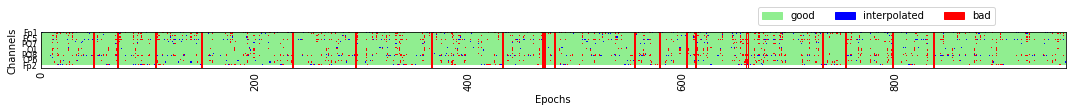

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/376627951.py:67: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 960 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/960 [00:00<?,       ?it/s]

Dropped 42 epochs: 30, 87, 92, 105, 140, 186, 194, 256, 319, 328, 338, 390, 393, 405, 414, 438, 442, 453, 475, 477, 490, 501, 515, 519, 551, 560, 569, 615, 647, 651, 668, 700, 722, 725, 728, 771, 779, 794, 880, 886, 905, 925


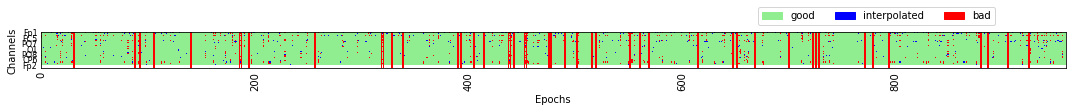

---------- 1+3_same-left-good -------------
---------- 1+3_same-left-bad -------------
---------- 1+3_same-right-good -------------
---------- 1+3_same-right-bad -------------
---------- 2+2_same-left-good -------------
---------- 2+2_same-left-bad -------------
---------- 2+2_same-right-good -------------
---------- 2+2_same-right-bad -------------
---------- 3+1_same-left-good -------------
---------- 3+1_same-left-bad -------------
---------- 3+1_same-right-good -------------
---------- 3+1_same-right-bad -------------
---------- 1+3_diff-left-good -------------
---------- 1+3_diff-left-bad -------------
---------- 1+3_diff-right-good -------------
---------- 1+3_diff-right-bad -------------
---------- 2+2_diff-left-good -------------
---------- 2+2_diff-left-bad -------------
---------- 2+2_diff-right-good -------------
---------- 2+2_diff-right-bad -------------
---------- 3+1_diff-left-good -------------
---------- 3+1_diff-left-bad -------------
---------- 3+1_diff-right-good --

1+3_same 2+2_same 3+1_same 1+3_diff 2+2_diff 3+1_diff left  \
Hudson_0017.vhdr      160      160      160      160      160      160  480   
Hudson_0021.vhdr      160      160      160      160      160      160  480   
Hudson_0020.vhdr      160      160      160      160      160      160  480   
Hudson_0016.vhdr      160      160      160      160      160      160  480   
Hudson_0031.vhdr      160      160      160      160      160      160  480   
Hudson_0027.vhdr      160      160      160      160      160      160  480   
Hudson_0026.vhdr       80       80       80       80       80       80  240   
Hudson_0030.vhdr      160      160      160      160      160      160  480   
Hudson_0025.vhdr      160      160      160      160      160      160  480   
Hudson_0033.vhdr      160      160      160      160      160      160  480   
Hudson_0029.vhdr      160      160      160      160      160      160  480   
Hudson_0013.vhdr      160      160      160      160      160      160  480   
Hudson_0028.vhdr      160      160      160      160      160      160  480   
Hudson_0032.vhdr      160      160      160      160      160      160  480   
Hudson_0024.vhdr      160      160      160      160      160      160  480   
Hudson_0015.vhdr      160      160      160      160      160      160  480   
Hudson_0023.vhdr      160      160      160      160      160      160  480   
Hudson_0035.vhdr      160      160      160      160      160      160  480   
Hudson_0019.vhdr      160      160      160      160      160      160  480   
Hudson_0018.vhdr      159      159      159      158      160      160  479   
Hudson_0034.vhdr      160      160      160      160      160      160  480   
Hudson_0022.vhdr      160      160      160      160      160      160  480   
Hudson_0014.vhdr      160      160      160      160      160      160  480   

                 right good  bad  ... 3+1_diff-right-good  \
Hudson_0017.vhdr   480  855  105  ...                  73   
Hudson_0021.vhdr   480  837  123  ...                  67   
Hudson_0020.vhdr   480  698  262  ...                  60   
Hudson_0016.vhdr   480  694  266  ...                  60   
Hudson_0031.vhdr   480  723  237  ...                  60   
Hudson_0027.vhdr   480  696  264  ...                  56   
Hudson_0026.vhdr   240  388   92  ...                  32   
Hudson_0030.vhdr   480  632  328  ...                  46   
Hudson_0025.vhdr   480  774  186  ...                  69   
Hudson_0033.vhdr   480  900   60  ...                  76   
Hudson_0029.vhdr   480  598  362  ...                  50   
Hudson_0013.vhdr   480  889   71  ...                  73   
Hudson_0028.vhdr   480  683  277  ...                  53   
Hudson_0032.vhdr   480  802  158  ...                  63   
Hudson_0024.vhdr   480  699  261  ...                  58   
Hudson_0015.vhdr   480  821  139  ...                  71   
Hudson_0023.vhdr   480  689  271  ...                  61   
Hudson_0035.vhdr   480  678  282  ...                  59   
Hudson_0019.vhdr   480  804  156  ...                  72   
Hudson_0018.vhdr   476  671  284  ...                  59   
Hudson_0034.vhdr   480  758  202  ...                  63   
Hudson_0022.vhdr   480  771  189  ...                  71   
Hudson_0014.vhdr   480  676  284  ...                  60   

                 3+1_diff-right-good-CDA right-good-CDA 3+1_diff-right-bad  \
Hudson_0017.vhdr               -0.257965      -0.040164                  7   
Hudson_0021.vhdr               -4.960558      -3.925458                 13   
Hudson_0020.vhdr               -1.648829      -1.346909                 20   
Hudson_0016.vhdr               -1.730869      -1.256612                 20   
Hudson_0031.vhdr               -2.084205      -0.660649                 20   
Hudson_0027.vhdr                0.686216       0.633361                 24   
Hudson_0026.vhdr               -0.081205       0.230871                  8   
Hudson_0030.vhdr               

In [4]:
#==================================================================
# General Variables
#==================================================================
study_id = 'Feldmann2018-Exp1'

triggers = dict();

triggers['1+3_same'] = [111, 112] 
triggers['2+2_same'] = [121, 122]
triggers['3+1_same'] = [131, 132]
triggers['1+3_diff'] = [141, 142] 
triggers['2+2_diff'] = [151, 152]
triggers['3+1_diff'] = [161, 162]

triggers['right'] = [111, 121, 131, 141, 151, 161]
triggers['left'] = [112, 122, 132, 142, 152, 162]

triggers['all'] = [111, 121, 131, 141, 151, 161, 112, 122, 132, 142, 152, 162]

# Labels
conds = ['1+3_same', '2+2_same', '3+1_same', '1+3_diff', '2+2_diff', '3+1_diff']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['PO8']
chan_left = ['PO7']

# Epoch Information
epoch_length = 1.5
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA info
cda_window = (0.3, 0.7) # Window #1
# cda_window = (1.0, 1.4) # Window #2

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
directory_path = '/Users/nick/Documents/PhD/CDA Datasets/Feldmann-Westefel 2018/AnalysisPipeline/Experiment1/'

for filepath in glob.iglob(directory_path + 'rawEEG/' + '*.vhdr'):
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_brainvision(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Set Electrodes Locations - Used Brain Products (locations seem to in eeg file...)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    
    preproc = raw
    
    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = mne.events_from_annotations(preproc)
        
    # Select Channels (to save time on cleaning)
    #preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    subject_str_idx = filename.rfind('.')
    subject_id = filename[subject_str_idx - 2: subject_str_idx]
    specific_events = get_specific_events(events[0], conds, sides, perfs, triggers, subject_id, internal_triggers, experiment=1)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## 2. Plot Grand CDA Average

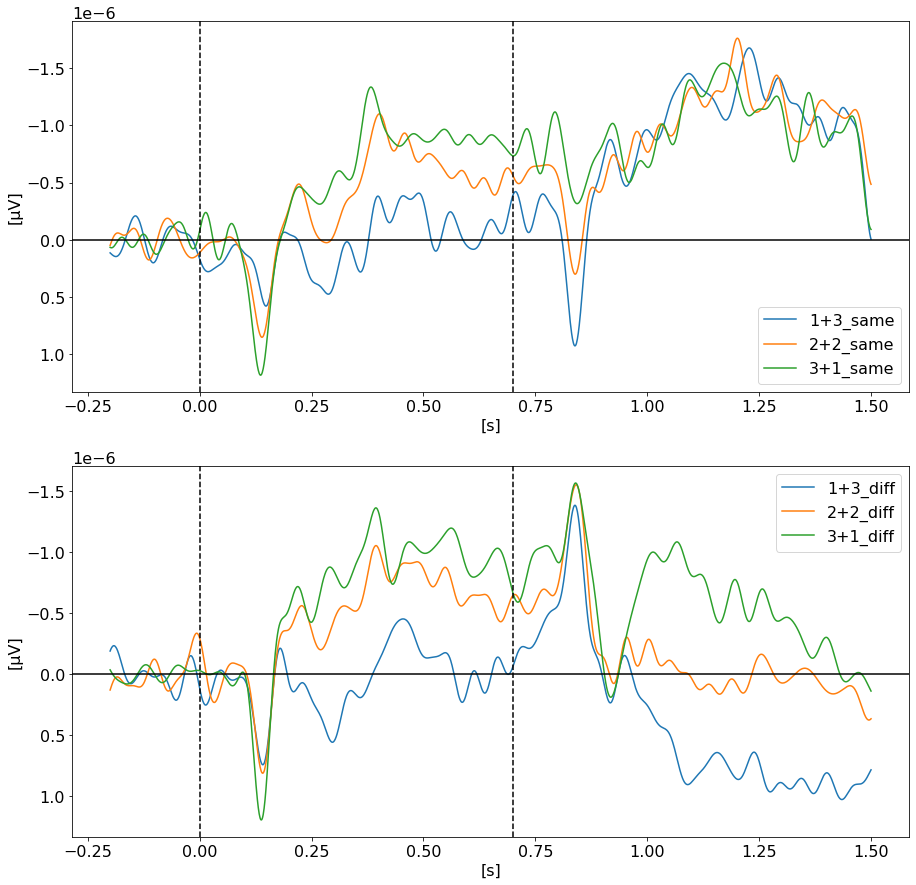

In [6]:
cda_all = dict()

# Get CDA GA
for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():        
        perf = 'good'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))
            
# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

# 2. Plot Figure #1
axs[0].plot(times, cda_all['1+3_same'].mean(0), label='1+3_same')
axs[0].plot(times, cda_all['2+2_same'].mean(0), label='2+2_same')
axs[0].plot(times, cda_all['3+1_same'].mean(0), label='3+1_same')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axvline(x=0.7, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

# 2. Plot Figure #2
axs[1].plot(times, cda_all['1+3_diff'].mean(0), label='1+3_diff')
axs[1].plot(times, cda_all['2+2_diff'].mean(0), label='2+2_diff')
axs[1].plot(times, cda_all['3+1_diff'].mean(0), label='3+1_diff')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axvline(x=0.7, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

plt.savefig("./{}-reprod.png".format(study_id), dpi=300, format='png')

## Save CDA Data

In [7]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [8]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict_all)

23

## Analysis - Bad Perf Trials

Text(0.5, 0, '[s]')

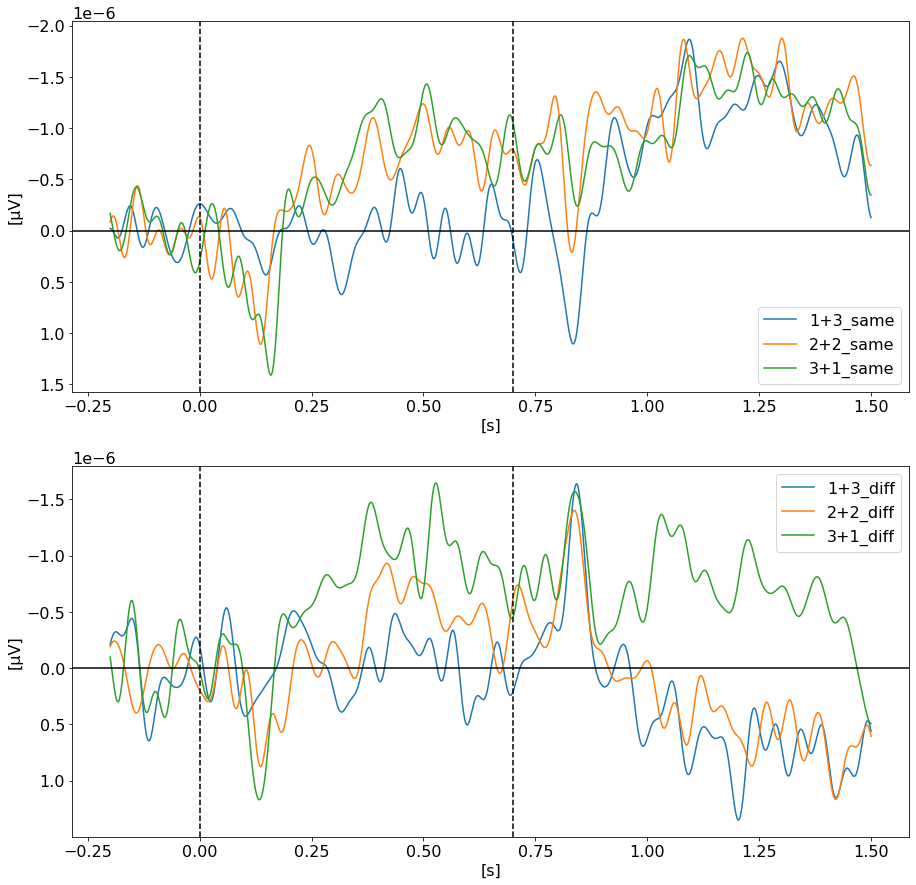

In [10]:
cda_all_bad = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all_bad[cond] = dict()

    for f in cda_dict_all.keys():
        perf = 'bad'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

# 2. Plot Figure #1
axs[0].plot(times, cda_all_bad['1+3_same'].mean(0), label='1+3_same')
axs[0].plot(times, cda_all_bad['2+2_same'].mean(0), label='2+2_same')
axs[0].plot(times, cda_all_bad['3+1_same'].mean(0), label='3+1_same')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axvline(x=0.7, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

# 2. Plot Figure #2
axs[1].plot(times, cda_all_bad['1+3_diff'].mean(0), label='1+3_diff')
axs[1].plot(times, cda_all_bad['2+2_diff'].mean(0), label='2+2_diff')
axs[1].plot(times, cda_all_bad['3+1_diff'].mean(0), label='3+1_diff')
#plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
#plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axvline(x=0.7, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

#plt.savefig("./{}-bad.png".format(study_id), dpi=300, format='png')

## Analysis - Show Spread per subject

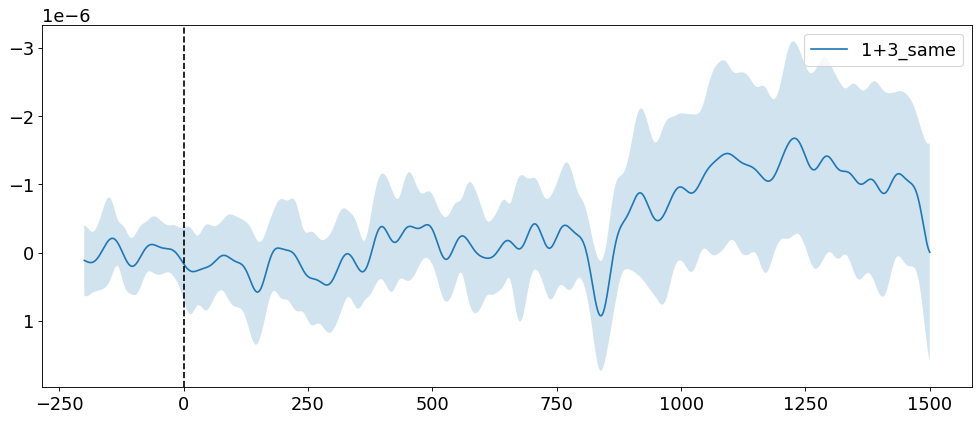

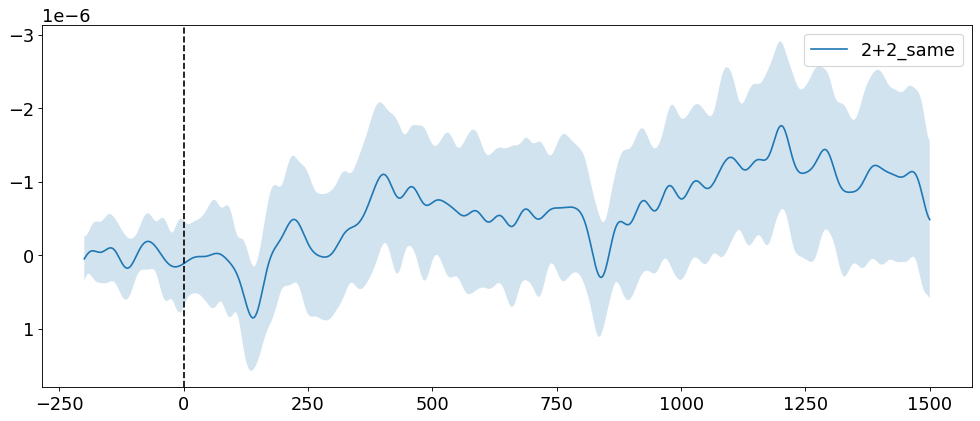

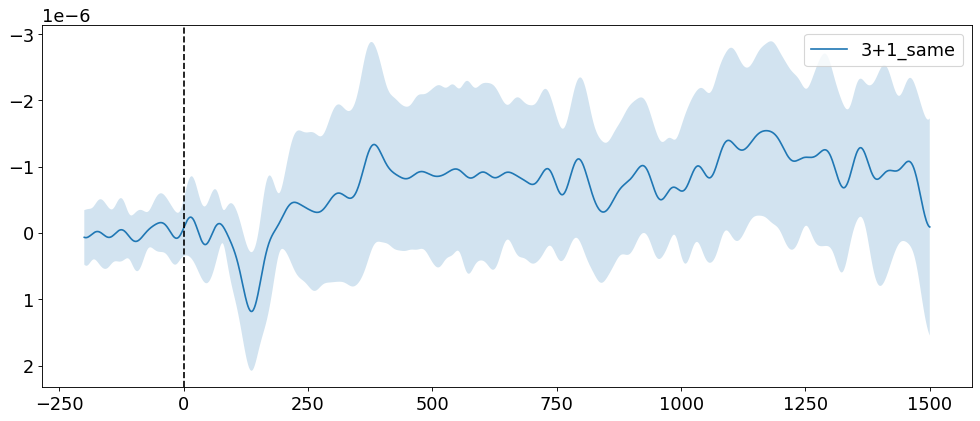

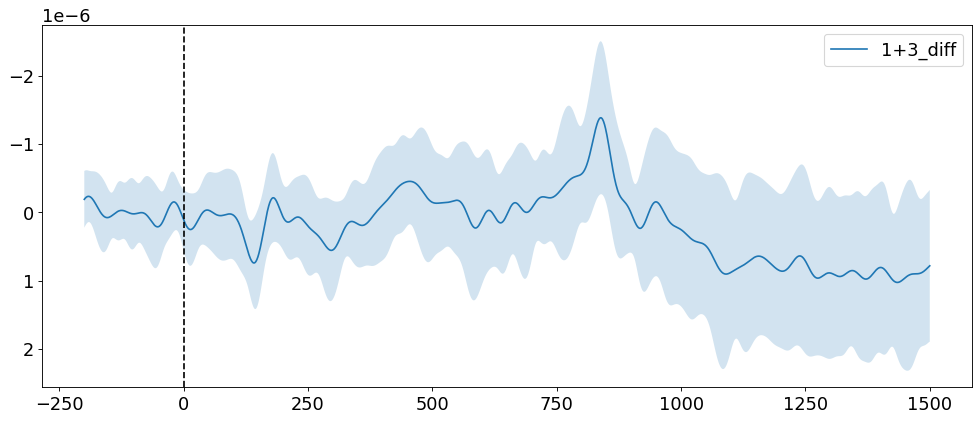

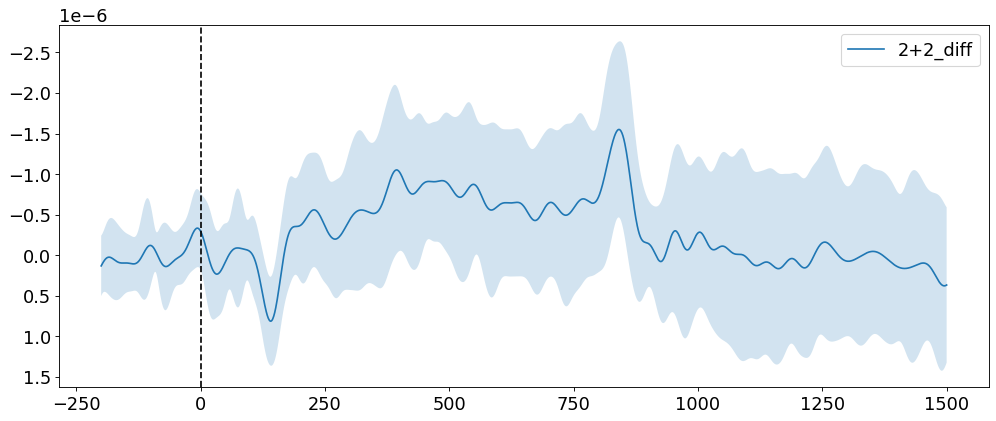

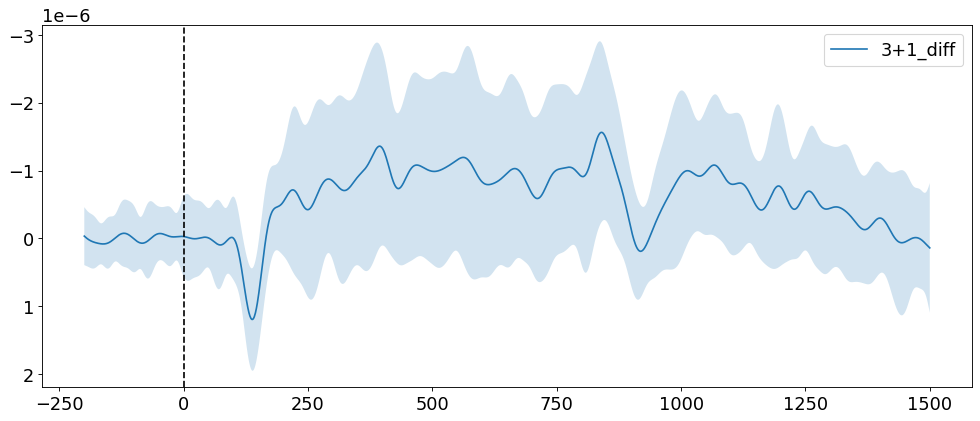

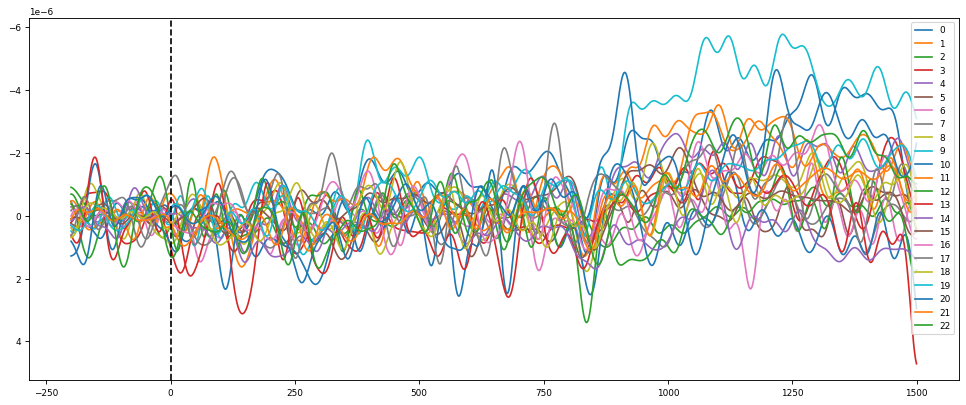

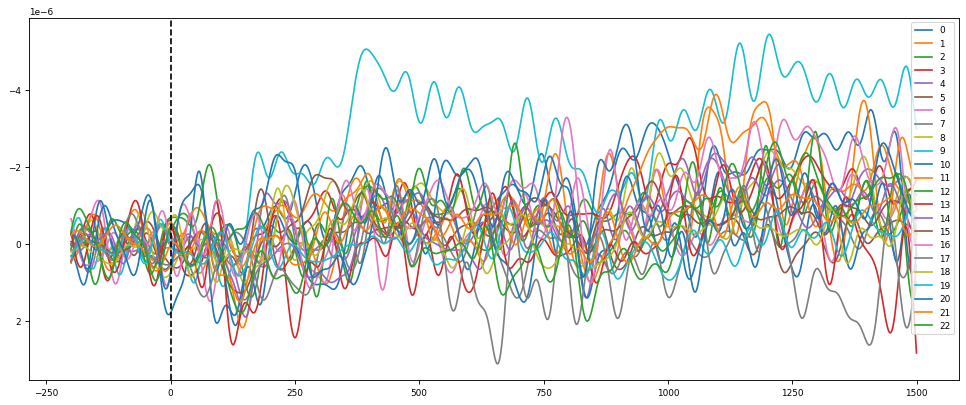

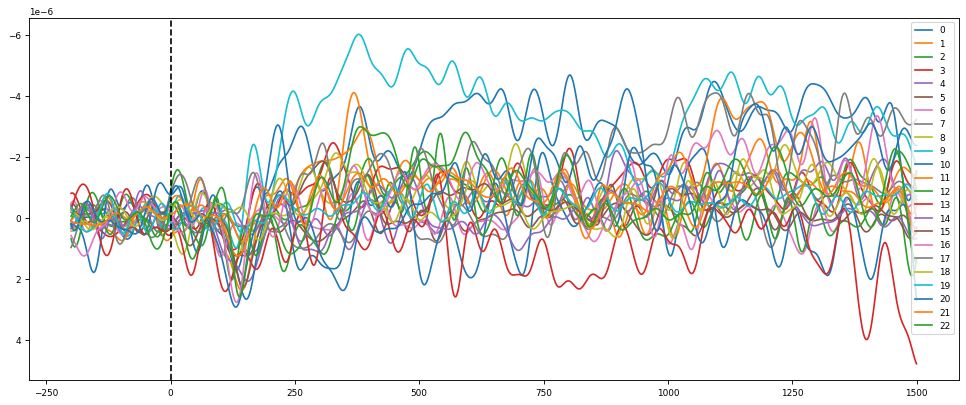

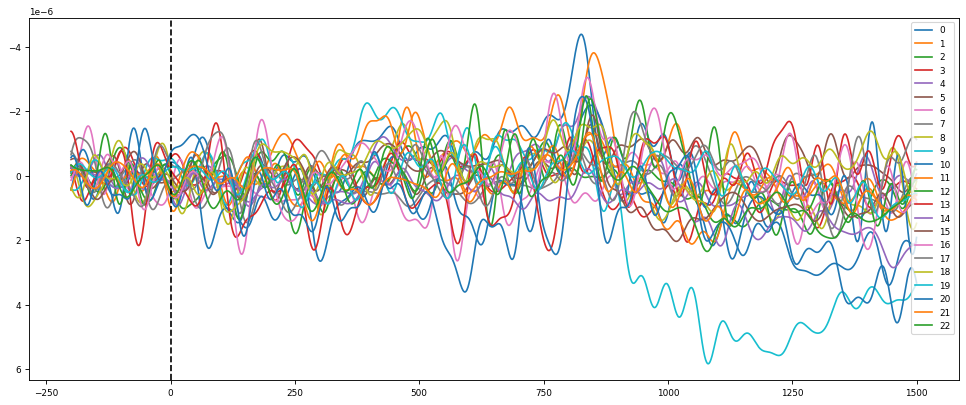

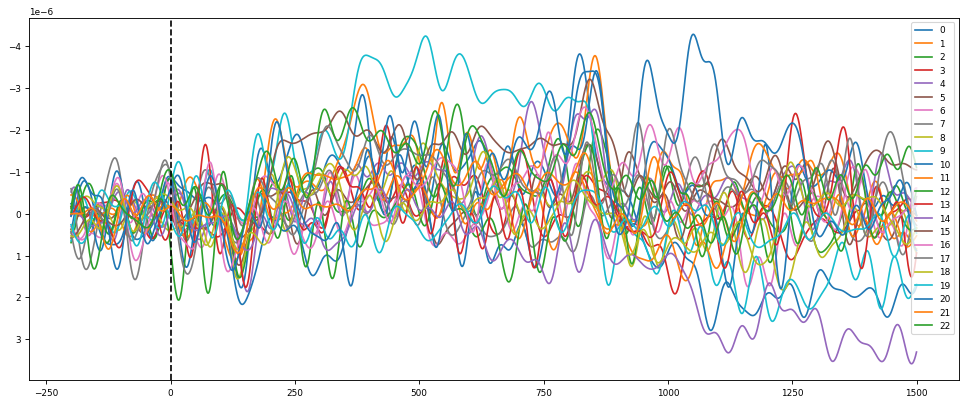

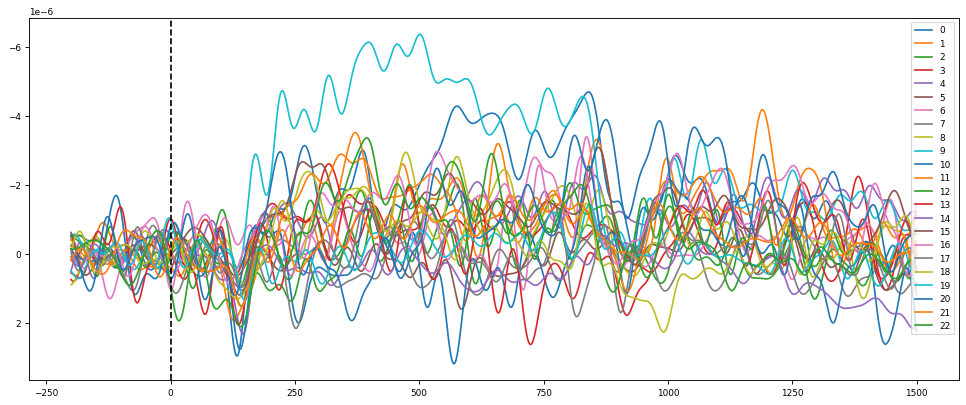

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_20966/2080971371.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, len(conds), figsize=(15,6))


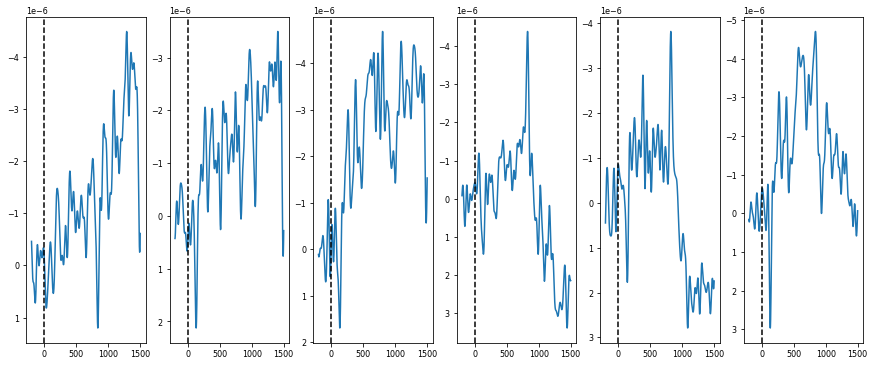

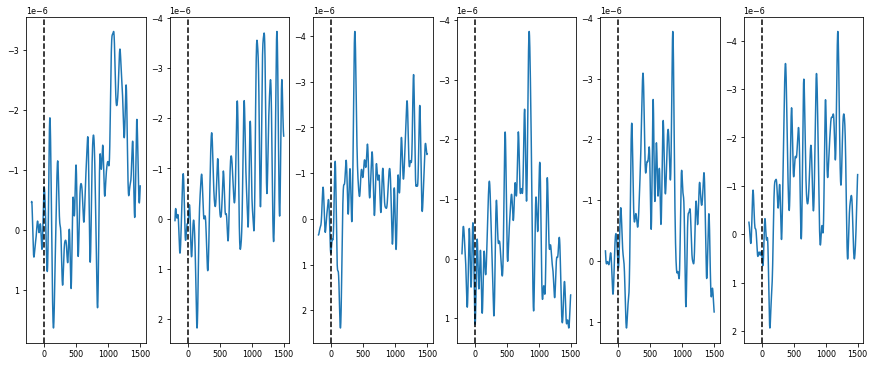

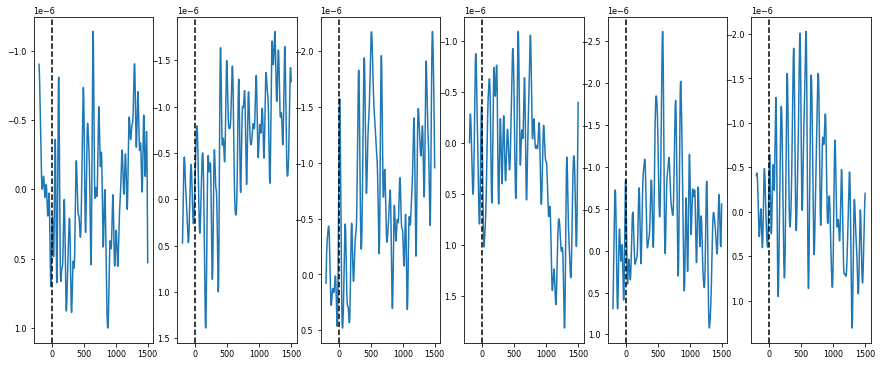

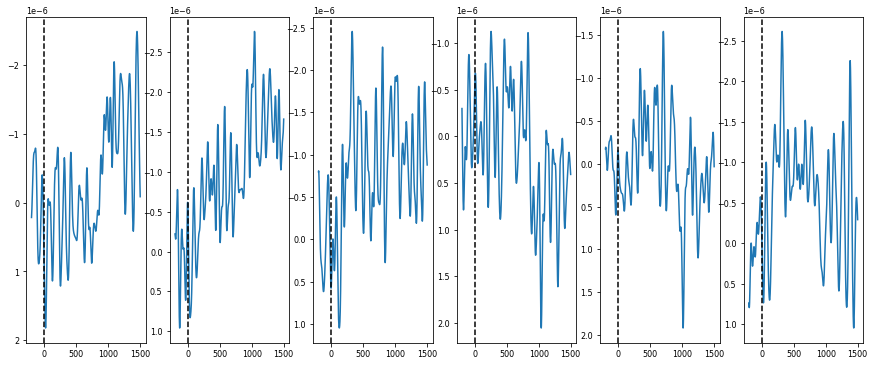

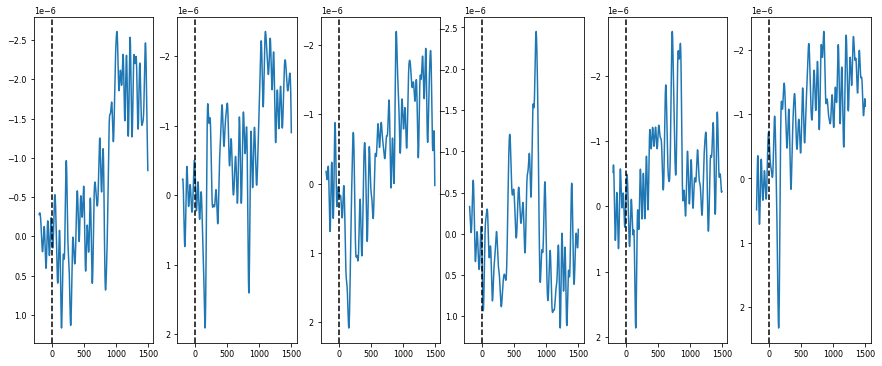

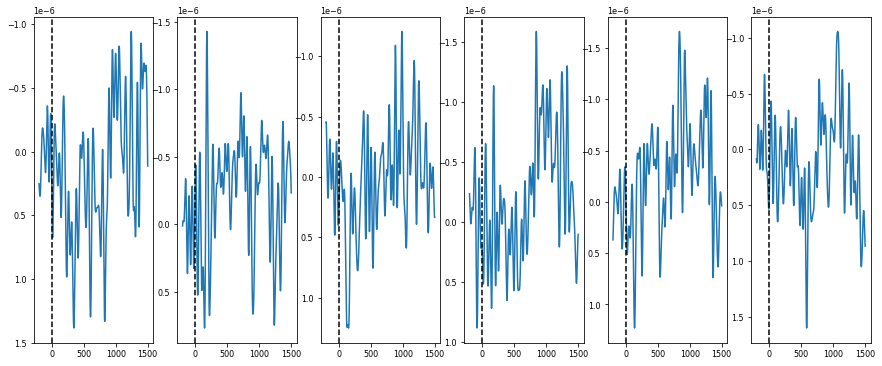

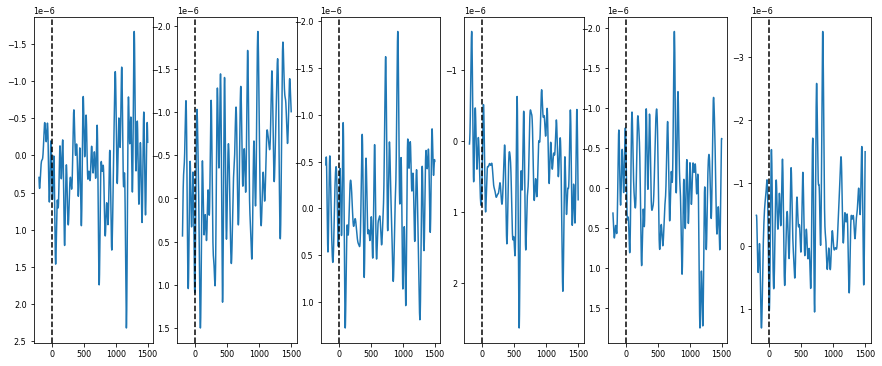

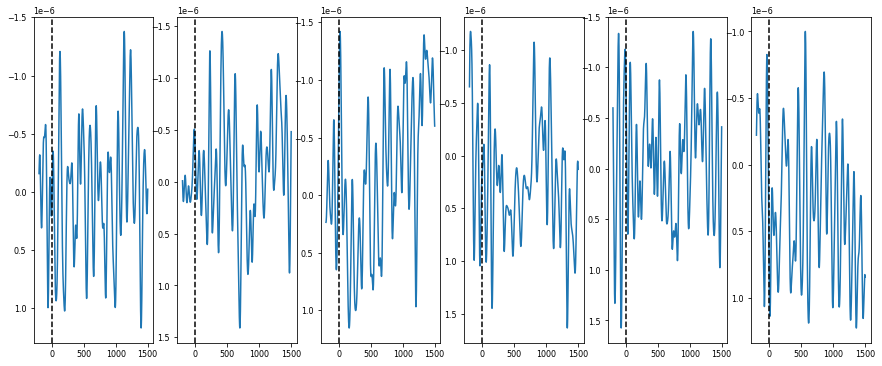

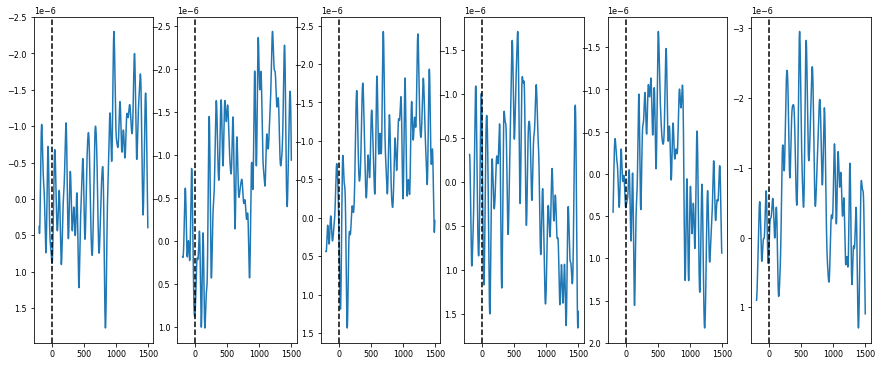

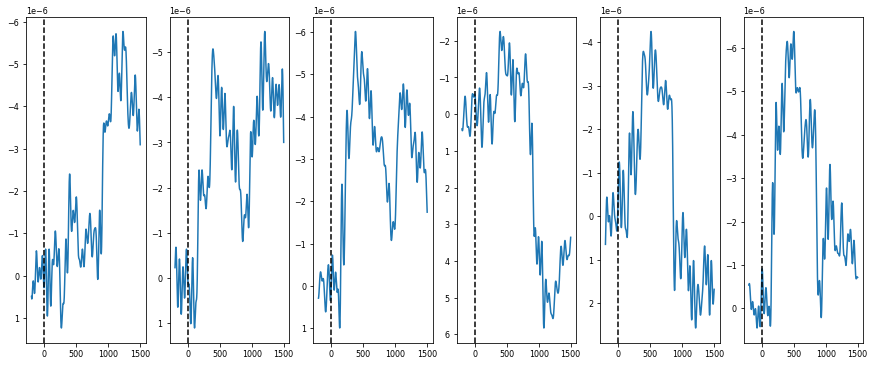

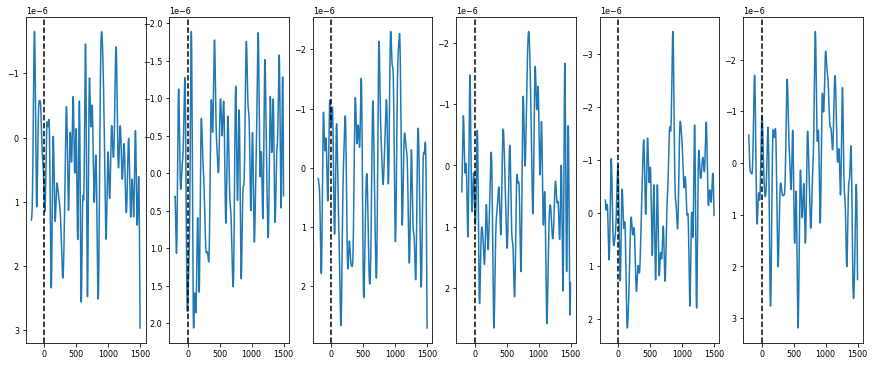

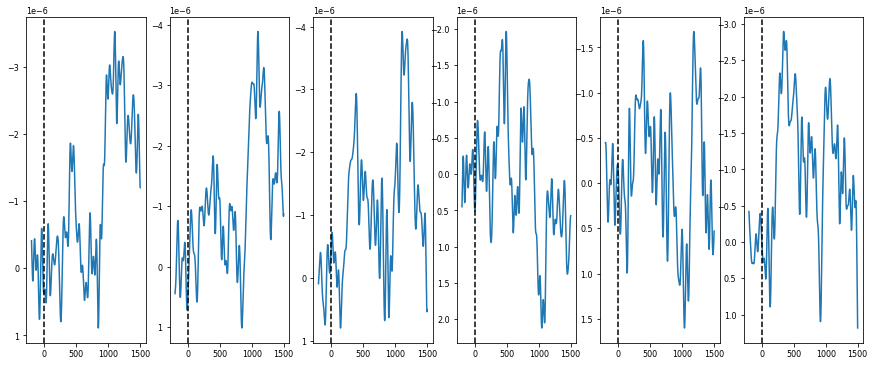

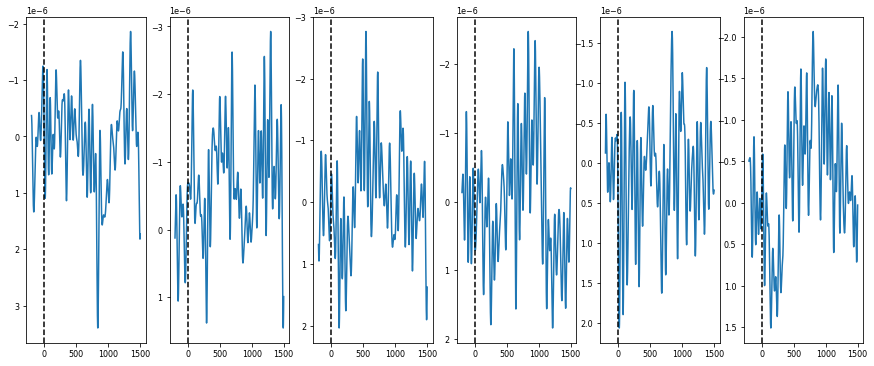

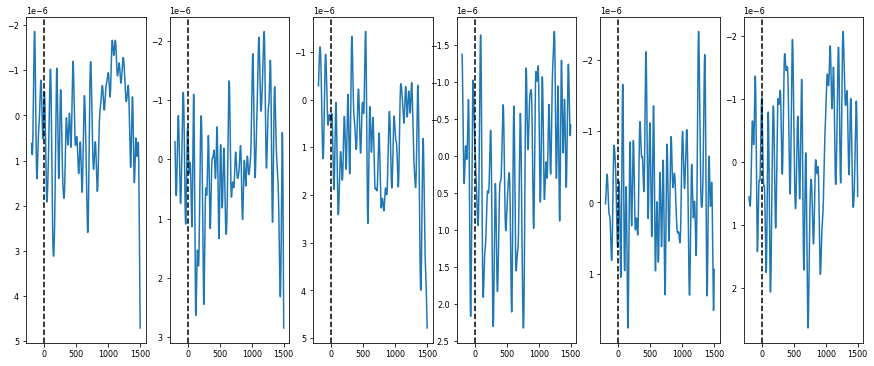

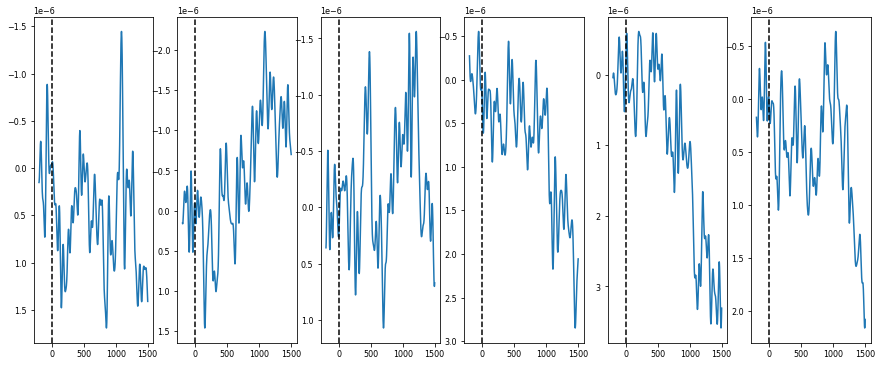

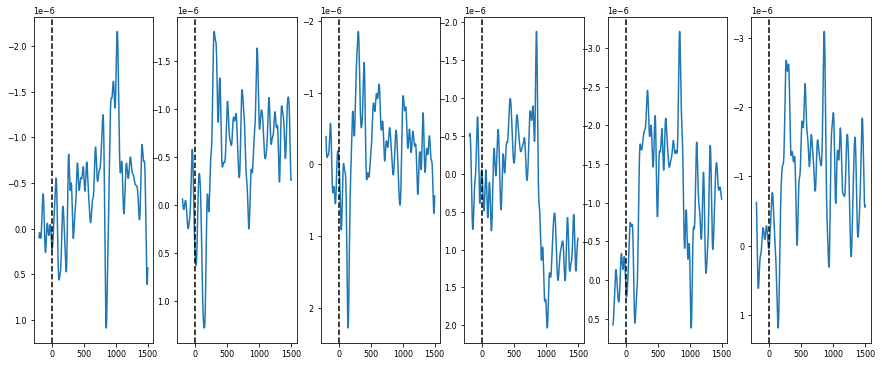

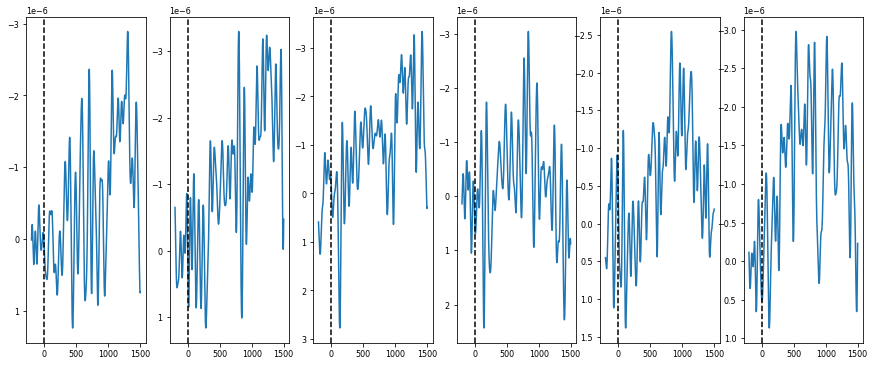

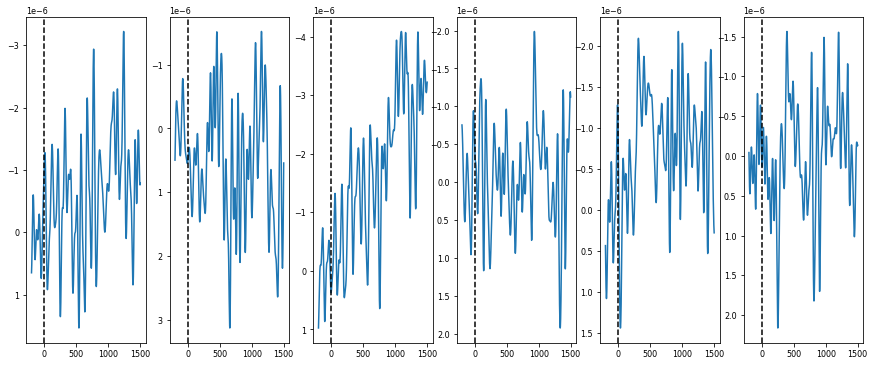

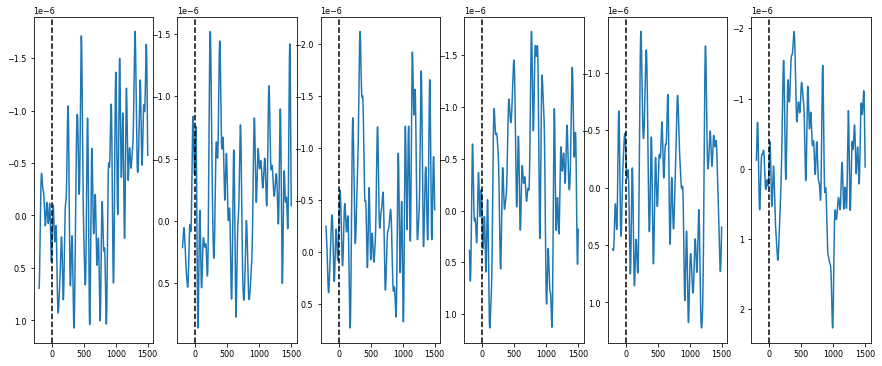

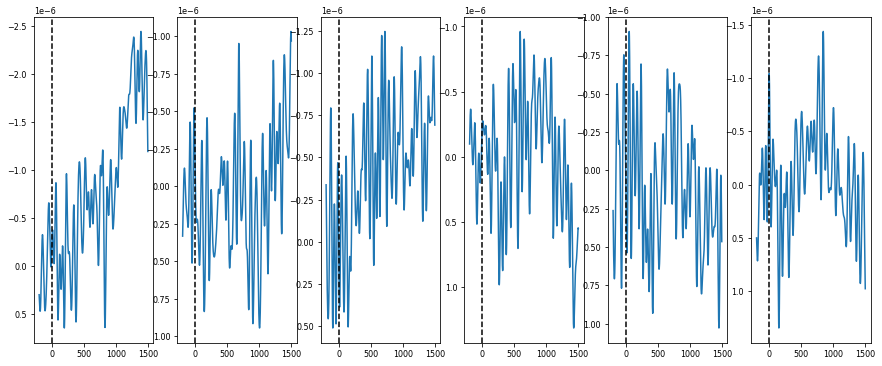

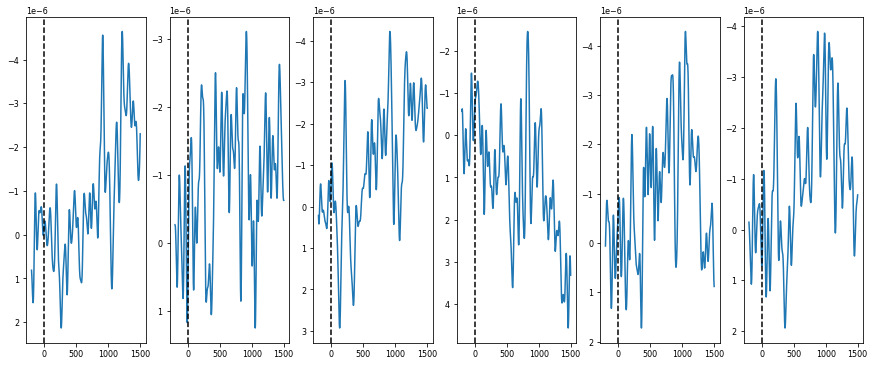

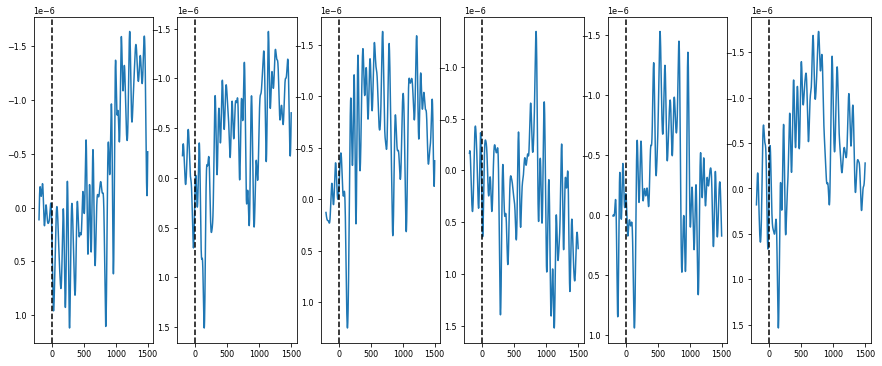

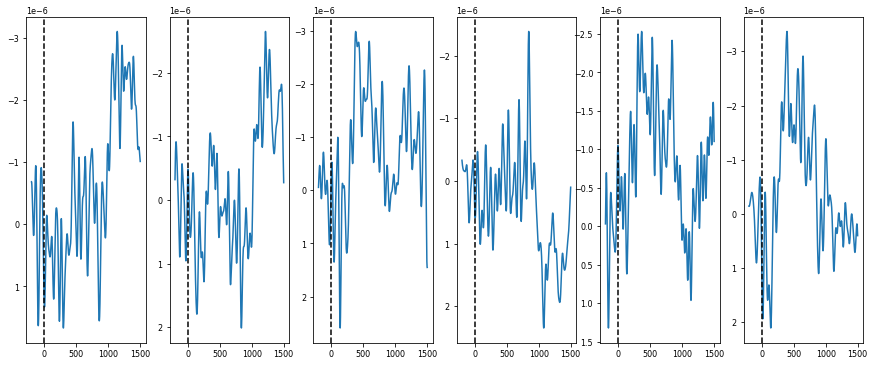

In [11]:
plt.rcParams.update({'font.size': 16})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    means = cda_all[cond].mean(0)
    stds = cda_all[cond].std(0)
    plt.plot((times * 1000), means, label=cond)
    plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    for i in range(len(cda_all[cond])):
        plt.plot((times * 1000), cda_all[cond][i,:], label='{}'.format(i))

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
#plt.figure(figsize=(15, 6), dpi=80)
for subject in range(len(cda_all[conds[0]])):
    fig, axs = plt.subplots(1, len(conds), figsize=(15,6))
    for i, cond in enumerate(conds):
        axs[i].plot((times * 1000), cda_all[cond][subject,:], label='{}'.format(i))
        axs[i].axvline(x=0, color='k', linestyle='--')
        axs[i].invert_yaxis()
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

## Analysis - Performance Report (CDA per Subject)

In [12]:
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

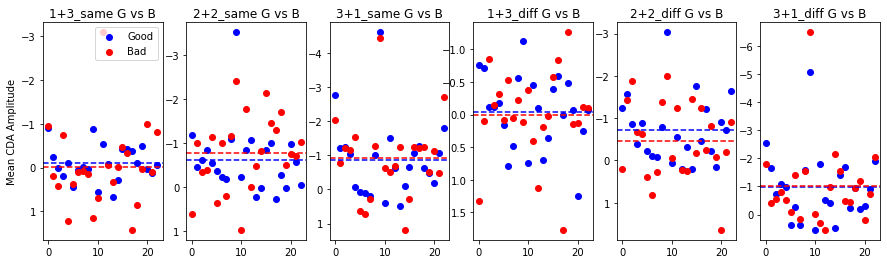

In [13]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')
    

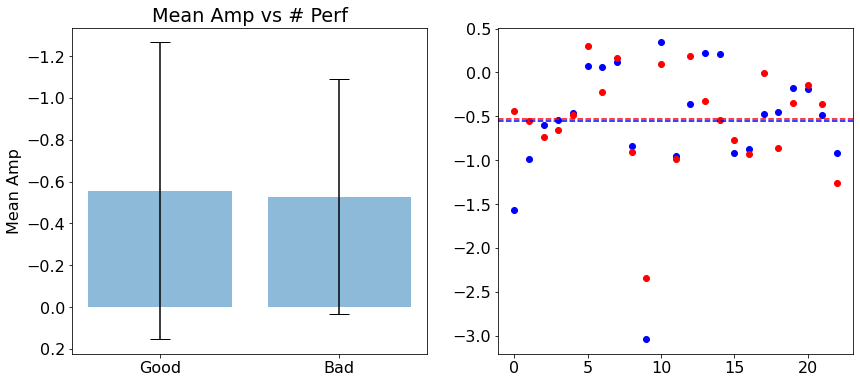

Corr Perf vs CDA Amp: (0.02224391520653702, 0.8833437736896517)


In [21]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].axhline(y=np.nanmean(report['good-CDA']), color='blue', linestyle='--')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')
axs[1].axhline(y=np.nanmean(report['bad-CDA']), color='red', linestyle='--')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

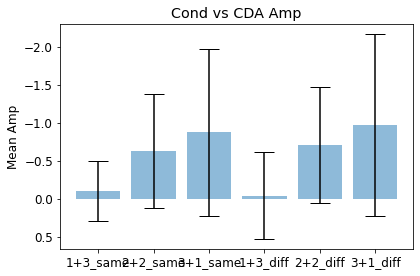

In [15]:
plt.rcParams.update({'font.size': 12})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Cond vs CDA Amp')
ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Pearson's Correlation
import scipy
x = []
y = []
set_sizes = conds
for i, ss in enumerate(['1+3_same', '2+2_same', '3+1_same']):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr Cond vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

x = []
y = []
set_sizes = conds
for i, ss in enumerate(['1+3_diff', '2+2_diff', '3+1_diff']):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr Cond vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

Corr Cond vs CDA Amp: (-0.365989559808959, 0.0019837127019189894)
Corr Cond vs CDA Amp: (-0.3929477427756374, 0.0008381685755041386)


## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (-0.1060458973998483, 0.48303711877826927)


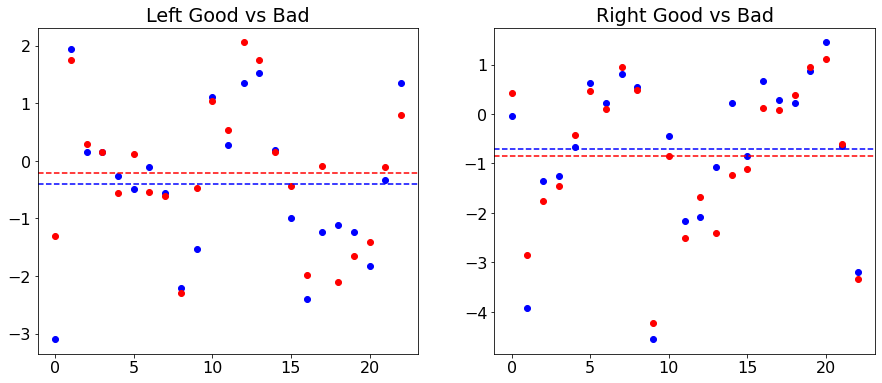

In [23]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
y= report['left-good-CDA']
axs[0].scatter(x=x, y=y, color='blue')
axs[0].axhline(y=np.nanmean(y), color='blue', linestyle='--')
x = range(len(report['left-bad-CDA']))
y= report['left-bad-CDA']
axs[0].scatter(x=x, y=y, color='red')
axs[0].axhline(y=np.nanmean(y), color='red', linestyle='--')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
y= report['right-good-CDA']
axs[1].scatter(x=x, y=y, color='blue')
axs[1].axhline(y=np.nanmean(y), color='blue', linestyle='--')
x = range(len(report['right-bad-CDA']))
y= report['right-bad-CDA']
axs[1].scatter(x=x, y=y, color='red')
axs[1].axhline(y=np.nanmean(y), color='red', linestyle='--')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ 1+3_same: (-0.39350987090680295, 0.06320793429593076)
Corr Perf Acc ~ 2+2_same: (-0.5076777762857165, 0.013399710684959402)
Corr Perf Acc ~ 3+1_same: (-0.4712467145289599, 0.02321725782680535)
Corr Perf Acc ~ 1+3_diff: (-0.5185388602194622, 0.0112449129555817)
Corr Perf Acc ~ 2+2_diff: (-0.5562466610809492, 0.0058457689310308075)
Corr Perf Acc ~ 3+1_diff: (-0.6842878986156948, 0.0003168958554956833)


Text(0, 0.5, 'CDA Mean Amp')

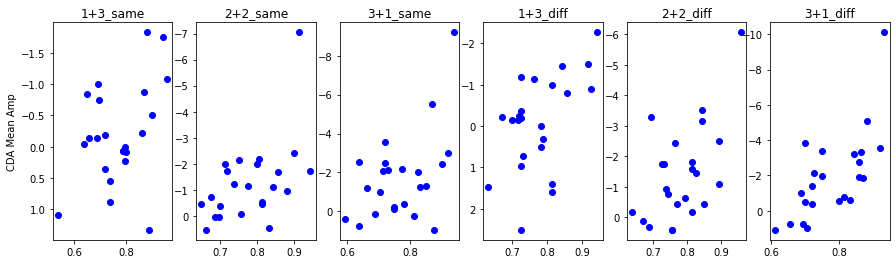

In [24]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

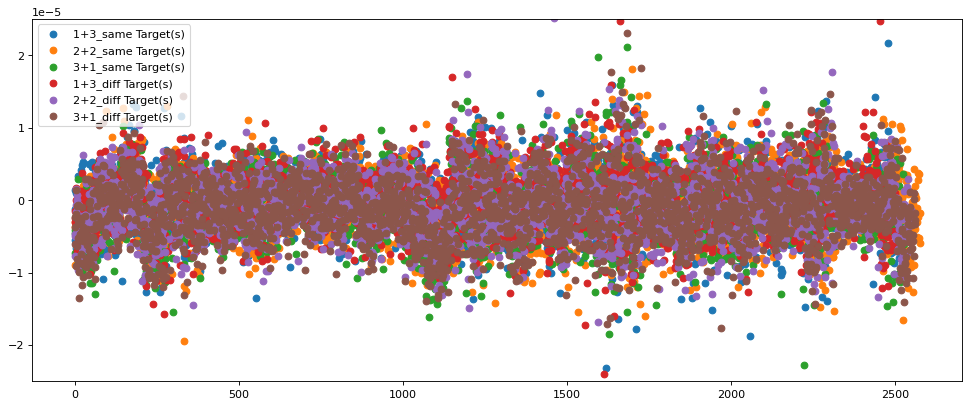

In [27]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()

## Trials: Good vs Bad

Cond = 1+3_same Targets: 2527 Good Perf Trials vs 750 Bad Perf Trials, with 1 outliers on graph.
Cond = 2+2_same Targets: 2577 Good Perf Trials vs 714 Bad Perf Trials, with 1 outliers on graph.
Cond = 3+1_same Targets: 2529 Good Perf Trials vs 735 Bad Perf Trials, with 0 outliers on graph.
Cond = 1+3_diff Targets: 2505 Good Perf Trials vs 734 Bad Perf Trials, with 1 outliers on graph.
Cond = 2+2_diff Targets: 2550 Good Perf Trials vs 693 Bad Perf Trials, with 4 outliers on graph.
Cond = 3+1_diff Targets: 2563 Good Perf Trials vs 732 Bad Perf Trials, with 2 outliers on graph.


Text(0, 0.5, 'CDA mean amplitude')

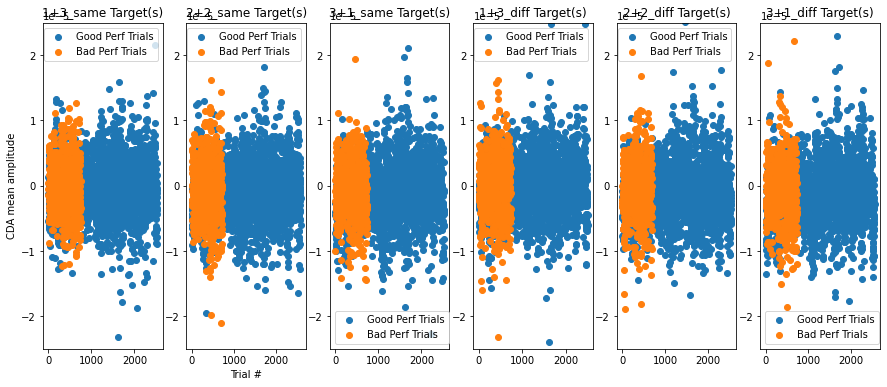

In [28]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

Cond = 1+3_same Targets: 1265 Good Left Trials vs 1262 Good Right Trials, with 1 outliers on graph
Cond = 2+2_same Targets: 1287 Good Left Trials vs 1290 Good Right Trials, with 1 outliers on graph
Cond = 3+1_same Targets: 1268 Good Left Trials vs 1261 Good Right Trials, with 0 outliers on graph
Cond = 1+3_diff Targets: 1254 Good Left Trials vs 1251 Good Right Trials, with 1 outliers on graph
Cond = 2+2_diff Targets: 1287 Good Left Trials vs 1263 Good Right Trials, with 3 outliers on graph
Cond = 3+1_diff Targets: 1264 Good Left Trials vs 1299 Good Right Trials, with 2 outliers on graph


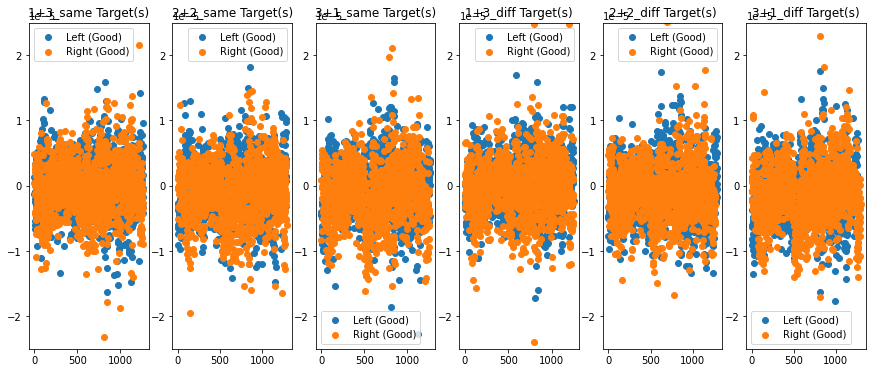

In [29]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        